IA & Data science (LU3IN0226) -- 2022-2023
--------
*&copy; Equipe pédagogique: Christophe Marsala, Olivier Schwander, Jean-Noël Vittaut.*

<font size="+1" color="RED"><b>[Q]</b></font> <font size="+1"><b>Indiquer dans la boîte ci-dessous vos noms et prénoms :</b></font>

Samy (Adem) YAZID & Alex XU

Ce projet peut être fait en binôme (et c'est fortement conseillé) ou tout seul.

Le nom de chaque membre du binôme doit être indiqué, et un seul rendu sur un des deux comptes Moodle doit être fait.

Les groupes de plus de 2 personnes ne sont pas autorisés.

<font color="RED" size="+1"><b>[Q]</b></font> **Renommer ce fichier ipython**

Tout en haut de cette page, cliquer sur <tt>projet-2</tt> et rajouter à la suite de <tt>projet-2</tt> les noms des membres du binômes séparés par un tiret.

<font color="RED" size="+1">IMPORTANT: soumission de votre fichier final</font>

**Nom à donner au notebook** : *projet-2-Nom1_Nom2.ipynb* 
- *Nom1* et *Nom2* : noms des membres du binôme

**Le compte-rendu doit être rendu sur la page Moodle.**

# Projet 2 - avril-mai 2023


<font size="+1" color="RED"><b>Date de rendu : lundi 22 mai 2023, avant 18h</b></font>
    
<b>Attention! le site Moodle ferme à 18h pile !</b> prévoyez de vous y connecter au moins 15mn avant la fermeture...

Vous devez compléter ce notebook en rajoutant vos expérimentations avec vos algorithmes d'apprentissage sur les données fournies dans le répertoire `data`.

## Travail à faire

Appliquer les algorithmes d'apprentissage vus tout au long du semestre sur les données afin de mettre en évidence des résultats intéressants.
Deux problèmes, au moins, doivent être traités:
- un problème d'apprentissage supervisé
- un problème d'apprentissage non supervisé


## Travail à rendre
Ce qui doit être remis avant la date limite : un fichier archive (`.tar`, `.tgz`, ou `.zip` uniquement) contenant:
- ce notebook complété. Il doit pouvoir être exécuté sans autre apport (pensez à vous en assurer avant de le rendre). 
- votre librairie iads sous la forme d'une archive avec votre répertoire `iads/` contenant tous les fichiers nécessaires 
- un fichier PDF dont le nom est de la forme: *projet-1-Nom1_Nom2.pdf* qui correspond à un poster décrivant l'ensemble des expérimentations menées et les résultats obtenus.


<b>IMPORTANT</b>: 
- Les fichiers de données ne doivent pas être inclus dans votre archive ! 
- Pensez à vérifier que votre archive contient bien tous les fichiers demandés et QUE les fichiers demandés.

## Soutenance des projets
La soutenance aura lieu le <font size="+1" color="RED">**mercredi 24 mai 2023**</font>, à partir de 14h. Un ordre de passage ainsi que la salle de TME où aura lieu les soutenances seront affichées sur le Moodle la veille.

La <b>soutenance est obligatoire</b> : tout projet pour lequel une soutenance n'a pas eu lieu sera noté $0$.

Modalités de la soutenance:
- durée de la soutenance : 10 mn pour un binôme, 7 mn pour un monôme ;
- elle a lieu devant un ordinateur avec le notebook et le poster comme support ;
    - elle commence par une rapide présentation des expérimentations réalisées et résultats obtenus (max. 4 à 5mns)
    - puis elle se poursuit par des questions posées individuellement aux membres du binômes sur les expériences ou le code python réalisé.
- la note de soutenance est individuelle pour chaque membre d'un binôme.




**Très important** : les fichiers de données doivent être placés de façon à respecter la structure de fichiers suivante :

          --iads/
              -- Classifiers.py
              -- etc.
          -- projet/
              -- ce_notebook.ipynb
              -- data/
                  -- AGRIBALYSE3-ingredients.csv
                  -- AGRIBALYSE3-etapes.csv
                  -- AGRIBALYSE3-synthese.csv


Dans le notebook que vous rendrez, le chargement des fichiers de données considèrera donc cette arborescence.


# Les données Agribalyse (version 3.1)

Les données sont issues des données publiques du site de l'ADEME: https://agribalyse.ademe.fr/
Il est conseillé de parcourir la documentation de ces données sur le site ci-dessus pour se familiariser avec les différentes informations qu'elles fournissent.

Pour ce projet, vous travaillerez sur les données sur les produits alimentaires dont la version originale est visible ici : https://doc.agribalyse.fr/documentation/acces-donnees

Si vous n'arrivez pas à télécharger ou à ouvrir ce fichier, des versions de ce fichier au format libreoffice et au format Excel 97 sont fournies dans l'archive `data_tableur`. Il est conseillé de regarder un de ces fichiers car vous y trouverez des informations complémentaires sur les noms des colonnes des 3 fichiers CSV de `data` décrits ci-dessous.

Pour vous aider à manipuler les données nous vous fournissons dans l'archive `data` : les 3 tables du fichiers sont fournies sous la forme de 3 fichiers CSV directement lisibles par la commande `read_csv` de Pandas (le séparateur de colonnes est le `';'`). Ce sont ces 3 fichiers à utiliser dans votre notebook. Un exemple de chargement est donné plus loin dans ce notebook. Les fichiers sont:
- AGRIBALYSE3-ingredients.csv
- AGRIBALYSE3-etapes.csv
- AGRIBALYSE3-synthese.csv

**Remarque**: les données Agribalyse de 2021 ont fait l'objet du projet de l'an dernier, cette année c'est une nouvelle version étendue de ces données qui sont utilisées pour ce projet, nous attendons donc des analyses qui tirent partie des nouveautés de cette nouvelle version.

## Exemples

In [24]:
# Importation des librairies standards:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  

# Importation de votre librairie iads:
# La ligne suivante permet de préciser le chemin d'accès à la librairie iads
import sys
sys.path.append('../')   # iads doit être dans le répertoire frère du répertoire courant !

# Importation de la librairie iads
import iads as iads

# importation de Classifiers
from iads import Classifiers as cl

# importation de utils
from iads import utils as ut

# importation de evaluation
from iads import evaluation as ev

# importation de Clustering
from iads import Clustering as clust

# commande TRES utile pour recharger automatiquement le code que vous modifiez dans les modules
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [25]:
data_synthese = pd.read_csv("data/AGRIBALYSE3-synthese.csv", sep=';') 
data_synthese.columns
print("Nombre de lignes: ",len(data_synthese))
print("Nombre de colonnes: ",len(data_synthese.columns))

Nombre de lignes:  2517
Nombre de colonnes:  29


In [26]:
data_etapes = pd.read_csv("data/AGRIBALYSE3-etapes.csv", sep=';') 
data_etapes.columns
print("Nombre de lignes: ",len(data_etapes))
print("Nombre de colonnes: ",len(data_etapes.columns))

Nombre de lignes:  2517
Nombre de colonnes:  132


In [27]:
data_ingredients = pd.read_csv("data/AGRIBALYSE3-ingredients.csv",sep=";")
data_ingredients.columns
print("Nombre de lignes: ",len(data_ingredients))
print("Nombre de colonnes: ",len(data_ingredients.columns))

Nombre de lignes:  6856
Nombre de colonnes:  27


## Traîtement des données du dataset Agribalyse3 Synthèse:<br>
On retire toutes les entrées qui ont plus de 3 en DQR pour éliminer les entrées peu fiables pouvant biaiser les résultats de notre étude<br>
Reste à : Retirer la colonne Changement Climatique puis à ajouter une nouvelle colonne label (égale à 1 ou -1/0)<br>
Puis on lance le supervisé (donc découpage en 60/20/20 et faire la classique)

In [28]:
data_synthese = data_synthese.query("DQR <= 3")

## Description du dataset Agribalyse3 Synthèse:<br>
Notre dataset 2D est constituée de 3 variables décrivant un point $x$ associé à un label ($-1$ ou $1$):<br>
**x1** : La coordonnée en abscisses de notre point $x$<br>
**x2** : La coordonnée en ordonnées de notre point $x$<br>
**label** : Le label associé au point $x$<br><br>
Affichons le dataset :

In [29]:
data_synthese.head()

,Code AGB,Code CIQUAL,Groupe d'aliment,Sous-groupe d'aliment,Nom du Produit en Français,LCI Name,code saison,code avion,Livraison,Matériau d'emballage,...,Effets toxicologiques sur la santé humaine : substances cancérogènes,Acidification terrestre et eaux douces,Eutrophisation eaux douces,Eutrophisation marine,Eutrophisation terrestre,Écotoxicité pour écosystèmes aquatiques d'eau douce,Utilisation du sol,Épuisement des ressources eau,Épuisement des ressources énergétiques,Épuisement des ressources minéraux
0,11084,11084,aides culinaires et ingrédients divers,algues,"Agar (algue), cru","Seaweed, agar, raw",2,0,Ambiant (long),LDPE,...,6.480000e-09,0.0997,0.001870,0.01330,0.1270,44.6,26.5,3.100,315.0,0.000088
4,20995,20995,aides culinaires et ingrédients divers,algues,"Ao-nori (Enteromorpha sp.), séchée ou déshydratée","Sea lettuce (Enteromorpha sp.), dried or dehyd...",2,0,Ambiant (long),LDPE,...,6.480000e-09,0.0997,0.001870,0.01330,0.1270,44.6,26.5,3.100,315.0,0.000088
5,20998,20998,aides culinaires et ingrédients divers,algues,Ascophylle noueux ou goémon noir (Ascophyllum ...,"North Atlantic rockweed (Ascophyllum nodosum),...",2,0,Ambiant (long),LDPE,...,6.370000e-09,0.0942,0.001860,0.01190,0.1120,43.8,26.0,3.100,313.0,0.000087
6,37000,37000,aides culinaires et ingrédients divers,ingrédients divers,Base de pizza à la crème,cream sauce for pizza base,2,0,Ambiant (long),Carton,...,1.470000e-09,0.0193,0.000312,0.00673,0.0793,19.9,99.2,0.455,23.4,0.000017
10,11507,11507,aides culinaires et ingrédients divers,ingrédients divers,Bicarbonate de soude,Sodium bicarbonate,2,0,Ambiant (long),Carton,...,1.470000e-09,0.0153,0.000598,0.00156,0.0422,83.6,16.0,2.020,14.7,0.000048


Faisons une brève analyse du dataset :

In [30]:
data_synthese.describe()

,Code CIQUAL,code saison,code avion,DQR,Score unique EF 3.1,Changement climatique,Appauvrissement de la couche d'ozone,Rayonnements ionisants,Formation photochimique d'ozone,Particules fines,...,Effets toxicologiques sur la santé humaine : substances cancérogènes,Acidification terrestre et eaux douces,Eutrophisation eaux douces,Eutrophisation marine,Eutrophisation terrestre,Écotoxicité pour écosystèmes aquatiques d'eau douce,Utilisation du sol,Épuisement des ressources eau,Épuisement des ressources énergétiques,Épuisement des ressources minéraux
count,1766.000000,1766.000000,1766.000000,1766.00000,1766.000000,1766.000000,1.766000e+03,1766.000000,1766.000000,1.766000e+03,...,1.766000e+03,1766.000000,1766.000000,1766.000000,1766.000000,1766.000000,1766.000000,1766.000000,1766.000000,1.766000e+03
mean,21356.791619,1.996602,0.001133,2.48325,0.693728,5.910111,5.089643e-07,1.147035,0.014002,5.725786e-07,...,3.975661e-09,0.080867,0.000748,0.025211,0.339789,56.583373,396.476829,4.689349,48.314892,2.010755e-05
std,13565.448250,0.075194,0.033643,0.33598,0.931952,8.725877,5.791266e-06,1.711997,0.023486,9.236969e-07,...,4.760823e-09,0.136000,0.000963,0.036512,0.594939,59.608742,757.215102,11.135659,52.993232,4.391616e-05
min,1.000000,0.000000,0.000000,1.20000,0.013000,0.039400,2.710000e-09,0.023000,0.000120,5.370000e-09,...,5.850000e-11,0.000499,0.000013,0.000213,0.001140,0.678000,-40.000000,-23.100000,1.710000,6.180000e-07
25%,12047.500000,2.000000,0.000000,2.24000,0.159000,1.100000,1.190000e-07,0.333000,0.003530,7.887500e-08,...,9.430000e-10,0.009338,0.000207,0.005150,0.034300,14.025000,52.400000,1.240000,20.700000,6.945000e-06
50%,20215.500000,2.000000,0.000000,2.50000,0.356000,2.625000,2.050000e-07,0.689000,0.006890,2.370000e-07,...,2.390000e-09,0.032000,0.000480,0.012600,0.122000,36.550000,153.000000,2.360000,30.800000,1.230000e-05
75%,25565.500000,2.000000,0.000000,2.75000,0.779250,6.140000,4.677500e-07,1.317500,0.014400,6.820000e-07,...,4.992500e-09,0.092800,0.000947,0.025675,0.334000,78.000000,335.750000,5.427500,59.950000,2.265000e-05
max,96778.000000,2.000000,1.000000,3.00000,5.970000,52.200000,2.430000e-04,22.800000,0.390000,6.240000e-06,...,4.560000e-08,0.920000,0.023900,0.212000,4.070000,484.000000,5580.000000,331.000000,612.000000,1.290000e-03


Taille de la base de données:  1766


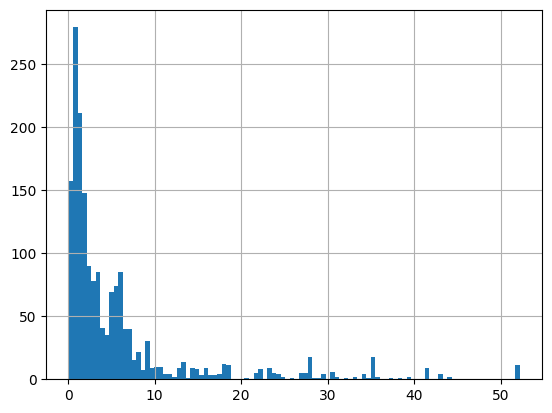

In [31]:
data_synthese["Changement climatique"].hist(bins=100)
print("Taille de la base de données: ",len(data_synthese))

On observe que les valeurs du changement climatique est très concentré entre 0 et 5. <br><br>

On va alors classer les données par les labels 1 et -1 en fonction de la médiane :
- supérieur à la médiane : 1
- inférieur ou égale à la médiane : -1

In [32]:
median = data_synthese["Changement climatique"].median()
data_synthese["Label"] = data_synthese["Changement climatique"].apply(lambda x: 1 if x > median else -1)

## Apprentissage supervisé :<br>
Commençons par séparer nos données en un ensemble d'entraînement, de test et de validation.<br>
En utilisant un ensemble de données pour entraîner un modèle et un autre ensemble pour le tester, on peut évaluer la capacité du modèle à généraliser ses prédictions à des données qu'il n'a pas vues lors de l'entraînement.<br>
De plus, la séparation des données en ensembles d'entraînement et de test sera effectuée de manière aléatoire pour éviter de biaiser les résultats.<br><br>
On choisit de d'affecter $1000$ entrées dans la base d'entraînement et $383$ entrées dans la base de test et de valition.

In [41]:
desc_set = np.array(data_synthese["Changement climatique"])
label_set = np.array(data_synthese["Label"])
(train_desc, train_label), (test_desc, test_label), (valid_desc, valid_label) = ut.genere_train_test2(desc_set, label_set, 500, 500, 383, 383)

print("Base d'apprentissage: ",train_desc.shape, " et ", len(train_label)," labels")
print("Base de test: ",test_desc.shape, " et ", len(test_label)," labels")
print("Base de validation: ",valid_desc.shape, " et ", len(valid_label)," labels")

Base d'apprentissage:  (1000,)  et  1000  labels
Base de test:  (383,)  et  383  labels
Base de validation:  (383,)  et  383  labels


### Classifieur KNN (K- Nearest Neighbours) :<br>

Le premier classifieur que nous allons utiliser est le classifieur KNN (k-plus proches voisins) qui n'a qu'un paramètre arbitraire : **k**.<br>
Nous allons donc essayer de déterminer le **k** optimal pour maximiser le taux de bonne classification sur notre dataset.

In [46]:
dict_accuracy_KNN = {}

for k in range(1, 10):
    perfKNN = []
    #Crossvalidation de 10 :
    index = np.random.permutation(len(train_desc)) # mélange des index
    Xm = train_desc[index]
    Ym = train_label[index]
    for i in range(10):
        Xapp, Yapp, Xtest, Ytest = ev.crossval_strat(Xm, Ym, 10, i)
        KNN = cl.ClassifierKNN(1, k) #(dimension, k)
        KNN.train(Xapp, Yapp)
        perfKNN.append(KNN.accuracy(Xtest, Ytest))
        
    #on stocke les résultats dans la liste associée
    dict_accuracy_KNN[k] = analyse_perfs(perfKNN)[0]

TypeError: object of type 'numpy.float64' has no len()